### Damped harmonic oscillator

**Model system**:

- Spring constant: $k$
- Particle mass: $m$
- Friction constant: $\zeta$
- Particle position: $ \boldsymbol R(t)$
- Particle velocity: $\boldsymbol V(t)$
- Friction force: $\color{blue}{ -\zeta \boldsymbol V(t)}$
- Spring force: $\color{red}{ k \boldsymbol R(t)}$

**Time evolution equations**:

$$
\begin{align}
\displaystyle\frac{d}{dt} \boldsymbol R(t) & = \boldsymbol V(t) \\
m \displaystyle\frac{d}{dt}\boldsymbol V(t) & = -\zeta \boldsymbol V(t) - k\boldsymbol R(t)
\end{align}
$$

**Euler method**:

$$
\begin{align}
\boldsymbol R_{i+1} & = \boldsymbol R_{i} + \displaystyle\int_{t_i}^{t_{i+1}} \boldsymbol V(t) dt \\
& \simeq \boldsymbol R_i + \boldsymbol V_i \Delta t \\
\boldsymbol V_{i+1} & = \boldsymbol V_i - \displaystyle\frac{\zeta}{m} \int_{t_i}^{t_{i+1}} \boldsymbol V(t) dt - \frac{k}{m} \int_{t_i}^{t_{i+1}} \boldsymbol R(t) dt \\
&\simeq \bigg( 1-\frac{\zeta}{m}\Delta t \bigg) \boldsymbol V_i - \frac{k}{m} \boldsymbol R_i \Delta t
\end{align}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
#%matplotlib nbagg

In [2]:
plt.style.use('ggplot')

In [3]:
# System Dimensions (x,y)
dim = 2
# Number of steps
nums = 1000
# Particle position
R = np.zeros(dim)
# Particle velocity
V = np.zeros(dim)

Rs = np.zeros([dim, nums])
Vs = np.zeros([dim, nums])

# Total energy of the system
Et = np.zeros(nums)

time = np.zeros(nums)

In [4]:
def initialize_anim():
    particles.set_data([], [])
    line.set_data([], [])
    title.set_text(r'')
    return particles, line, title

def animate(i):
    global R, V, F, Rs, Vs, time, Et
    R, V = R+V*dt, V*(1-zeta/m*dt) - k/m*dt*R
    Rs[0:dim, i] = R
    Vs[0:dim, i] = V
    time[i] = i*dt
    Et[i] = 0.5 * m * np.linalg.norm(V)**2 + 0.5*k*np.linalg.norm(R)**2

    particles.set_data(R[0], R[1])
    line.set_data(Rs[0,0:i], Rs[1,0:i])
    title.set_text(r"$t = {0:.2f}, E_T = {1:.3f}$".format(i*dt,Et[i]))
    return particles, line, title


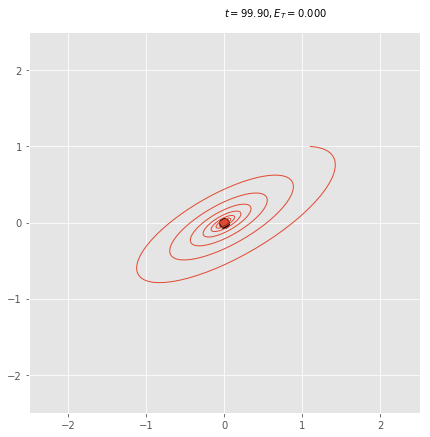

In [11]:
m, k, zeta = 1.0, 1.0, 0.25

R[0], R[1] = 1.0, 1.0
V[0], V[1] = 1.0, 0.0

dt = 0.1 * np.sqrt(k/m)

box = 5

fig, ax = plt.subplots(figsize=(7, 7))

ax = plt.axes(xlim=(-box/2,box/2), ylim=(-box/2,box/2))

particles, = ax.plot([], [], 'ko',ms=10)
line, = ax.plot([], [], lw=1)
title = ax.text(0.5, 1.05, r'', transform=ax.transAxes, va='center')
anim = animation.FuncAnimation(fig, animate, init_func=initialize_anim,
                               frames=nums, interval=7, blit=True, repeat=False)

HTML(anim.to_html5_video())

In [6]:
#anim.save('dho.mp4', writer='ffmpeg', dpi=400, fps=20)

***

**Total energy of the harmonic oscillator**:

$$
E_{T}(t) = E_{\textrm{kinetic}}(t) + E_{\textrm{potential}}(t) = \displaystyle\frac{1}{2} m \boldsymbol V^2(t) + \frac{1}{2} k \boldsymbol R^2(t)
$$


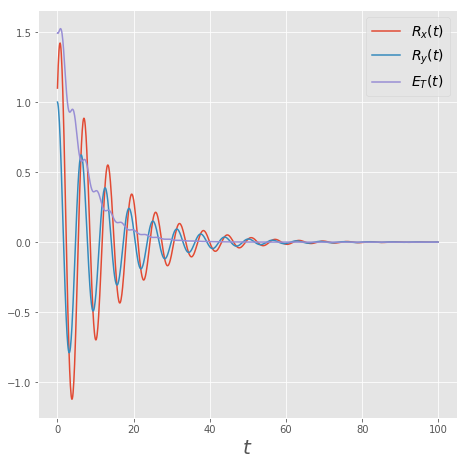

In [7]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time, Rs[0])
ax.plot(time, Rs[1])
ax.plot(time, Et)

ax.legend([r'$R_x(t)$', r'$R_y(t)$', r'$E_T(t)$'], fontsize=14)
plt.show()